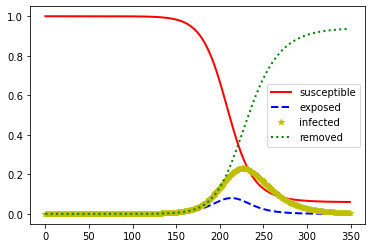

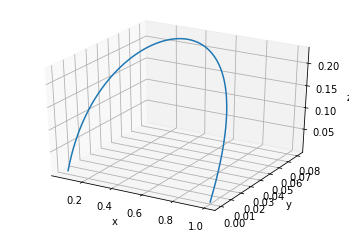

In [3]:
# quantitative modeling of infectious disease dynamics
# dynamics are modeled using a standard SEIR 
# (Susceptible-Exposed-Infected-Removed) model of disease spread
# The states are: susceptible (S), exposed (E), infected (I) and removed (R).
# β(t) is called the transmission rate or effective contact rate 
# (the rate at which individuals bump into others and expose them to the virus). 
# σ is called the infection rate (the rate at which those who are exposed become infected) 
# γ is called the recovery rate (the rate at which infected people recover or die) 
# https://julia.quantecon.org/continuous_time/seir_model.html

import matplotlib.animation as animation
from scipy.integrate import odeint
from numpy import arange
from pylab import *

def CovidSystem(state, t):
    s, e, i, r = state
    γ = 1/18
    R_0 = 3.0                  # basic reproduction number for the SEIR model
    σ = 1/5.2
    
    d_s = -γ*R_0*s*i           # ds/dt = -γR₀si
    d_e = γ*R_0*s*i -  σ*e     # de/dt =  γR₀si -σe
    d_i = σ*e - γ*i           # di/dt =         σe -γi
    d_r = γ*i                 # dr/dt =             γi

    return [d_s, d_e, d_i, d_r]

t = arange(0.0, 350.0)        # ≈ 350 days

i_0 = 1E-7                  # 33 = 1E-7 * 330 million population = initially infected
e_0 = 4.0 * i_0             # 132 = 1E-7 *330 million = initially exposed
s_0 = 1.0 - i_0 - e_0
r_0 = 0.0

init_state = [s_0, e_0, i_0, r_0]

state = odeint(CovidSystem, init_state, t)

plot(t, state[:, 0],'r-',linewidth=2, label='susceptible')
plot(t, state[:, 1],'b--',linewidth=2, label='exposed')
plot(t, state[:, 2],'y*',linewidth=2, label='infected')
plot(t, state[:, 3],'g:',linewidth=2, label='removed')
legend()
show()

from mpl_toolkits.mplot3d import Axes3D
fig = figure()
ax = fig.gca(projection='3d')
#portretul de faza pentru 'susceptible', 'exposed', 'infected'
ax.plot(state[:,0],state[:,1],state[:,2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
show()

